# Final Project Notebook

### I'll keep track of my final project work here



#### Suggestions of EDA from Joe

Example EDA for your final project check-in submission on May 15 may include (but is not limited to):
- Identifying the amount and type of your data
- Cleaning 'aesthetics' of your dataset (renaming columns to remove space or have consistency)
- Checking data integrity (missing values, and how you may fill them in; identifying and explaining/handling anomalies)
- Filtering and sorting of your data to identify relevant populations
- Plotting distributions of variables of interest
- Creating plots visualizing anticipated relationships that may inform your model building

In [376]:
# import packages that I'll probably use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [377]:
# Read in the Data

ksmb_csv = './kickstarter-project-statistics/most_backed.csv'
ksmb = pd.read_csv(ksmb_csv)


In [378]:
ksmb.columns

Index(['Unnamed: 0', 'amt.pledged', 'blurb', 'by', 'category', 'currency',
       'goal', 'location', 'num.backers', 'num.backers.tier', 'pledge.tier',
       'title', 'url'],
      dtype='object')

### First 4000 live projects that are currently campaigning on Kickstarter (live.csv)

Last updated: 2016-10-29 5pm PDT
- amt.pledged: amount pledged (float)
- blurb: project blurb (string)
- by: project creator (string)
- country: abbreviated country code (string of length 2)
- currency: currency type of amt.pledged (string of length 3)
- end.time: campaign end time (string "YYYY-MM-DDThh:mm:ss-TZD")
- location: mostly city (string)
- pecentage.funded: unit % (int)
- state: mostly US states (string of length 2) and others (string)
- title: project title (string)
- type: type of location (string: County/Island/LocalAdmin/Suburb/Town/Zip)
- url: project url after domain (string)

### Top 4000 most backed projects ever on Kickstarter (most_backed.csv)

- Last updated: 2016-10-30 10pm PDT
- amt.pledged
- blurb
- by
- category: project category (string)
- currency
- goal: original pledge goal (float)
- location
- num.backers: total number of backers (int)
- num.backers.tier: number of backers corresponds to the pledge amount in pledge.tier (int[len(pledge.tier)])
- pledge.tier: pledge tiers in USD (float[])
- title
- url

In [379]:
ksmb.head(5)

,Unnamed: 0,amt.pledged,blurb,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,0,8782571.0,\r\nThis is a card game for people who are int...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,1,6465690.0,"\r\nAn unusually addicting, high-quality desk ...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,2,5408916.0,\r\nBring Reading Rainbow’s library of interac...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,3,5702153.0,\r\nUPDATED: This is it. We're making a Veroni...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,4,3336371.0,"\r\nAn adventure game from Tim Schafer, Double...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure


In [380]:
# Get rid of the Unnamed column, something didn't get pulled through right
del ksmb['Unnamed: 0']


In [381]:
# Going to rename all the columns that have periods in them with underscores
ksmb.rename(columns = {'amt.pledged' : 'pledged_amount'}, inplace=True)
ksmb.rename(columns = {'pledge.tier' : 'pledge_tier'}, inplace=True)
ksmb.rename(columns = {'num.backers' : 'backers'}, inplace=True)
ksmb.rename(columns = {'num.backers.tier' : 'backers_by_tier'}, inplace=True)

In [384]:
# What project had the highest pledge amount
print(ksmb.loc[ksmb['pledged_amount'].idxmax()])

pledged_amount                                            2.0339e+07
blurb              \r\nColor e-paper smartwatch with up to 7 days...
by                                                 Pebble Technology
category                                              Product Design
currency                                                         usd
goal                                                          500000
location                                               Palo Alto, CA
backers                                                        78471
backers_by_tier    [10000, 22991, 5278, 19999, 6041, 4717, 4998, ...
pledge_tier        [159.0, 179.0, 179.0, 250.0, 250.0, 338.0, 400...
title               Pebble Time - Awesome Smartwatch, No Compromises
url                /projects/597507018/pebble-time-awesome-smartw...
Name: 5, dtype: object


In [386]:
# Some of the observations have '...' in it, so I will clean that out 

clean_tiers = []
for i,row in enumerate(ksmb['pledge_tier']):
    if '...' in row:
        clean_tiers.append(i)
print(clean_tiers)

[714, 981, 1170, 1409, 3395, 3744]


In [387]:
ksmb = ksmb.drop(ksmb.index[clean_tiers])

In [388]:
# The following functions turn the variables pledge_tier and backers_by tier into lists containing floats rather than strings

def number_tier(string):    
    return len(string[1:-1].split(', '))

def new_tiers(string):
    tiers = []
    for s in string[1:-1].split(', '):
        tiers.append(float(s))
    return tiers

# Here I am replacing the columns with the float values colmns, as well as creating a new column that displays the overall
# number of tiers each project offers

ksmb['number_of_tiers'] = ksmb['pledge_tier'].apply(number_tier)
ksmb['pledge_tier'] = ksmb['pledge_tier'].apply(new_tiers)
ksmb['backers_by_tier'] = ksmb['backers_by_tier'].apply(new_tiers)


In [389]:
# Check for any null values

ksmb.pledge_tier.isnull().sum()

0

In [392]:
# Add another column that represents the percent overfunded that each project reached. For the most backed projects, each 
# project was obviously at least 100% funded, so we can calculate how much over that 100% goal each project reached.

ksmb['percent_overfunded'] = (ksmb['pledged_amount']/ksmb['goal'])

print(ksmb.percent_overfunded.describe())
print(ksmb.loc[ksmb['percent_overfunded'].idxmax()])

count      3994.000000
mean         70.206361
std        2015.758049
min           1.000000
25%           2.010495
50%           4.584257
75%          10.517017
max      104277.000000
Name: percent_overfunded, dtype: float64
pledged_amount                                                   104277
blurb                 \r\nVulfpeck's 2016 release, The Beautiful Gam...
by                                                        Jack Stratton
category                                                          Music
currency                                                            usd
goal                                                                  1
location                                                Los Angeles, CA
backers                                                            3917
backers_by_tier                                  [1354.0, 2419.0, 95.0]
pledge_tier                                         [10.0, 25.0, 100.0]
title                                   VULFPECK /// Th

In [393]:
# Lets take a look at some of the most active cities
ksmb.location.value_counts()

San Francisco, CA                         279
Los Angeles, CA                           270
New York, NY                              212
Seattle, WA                               146
London, UK                                132
Chicago, IL                               121
Brooklyn, NY                              103
Portland, OR                               84
San Diego, CA                              62
Toronto, Canada                            60
Austin, TX                                 60
Boston, MA                                 56
Salt Lake City, UT                         48
Atlanta, GA                                43
Dallas, TX                                 39
Washington, DC                             30
St. Louis, MO                              30
Oakland, CA                                29
Montreal, Canada                           28
Cambridge, MA                              28
San Jose, CA                               27
Paris, France                     

In [394]:
# Create a variable that is just the two letter state code by pulling last two digits from location

In [395]:
def grab_state(place):
    return place.split(',')[1].strip()

In [396]:
ksmb['State'] = ksmb.location.apply(grab_state)

In [397]:
ksmb.head(2)

,pledged_amount,blurb,by,category,currency,goal,location,backers,backers_by_tier,pledge_tier,title,url,number_of_tiers,percent_overfunded,State
0,8782571.0,\r\nThis is a card game for people who are int...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505.0, 202934.0, 200.0, 5.0]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,4,878.2571,CA
1,6465690.0,"\r\nAn unusually addicting, high-quality desk ...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788.0, 250.0, 43073.0, 21796.0, 41727.0, 2162...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,12,431.0460,CO


In [398]:
ksmb.describe()

,pledged_amount,goal,backers,number_of_tiers,percent_overfunded
count,3.994000e+03,3.994000e+03,3994.000000,3994.000000,3994.000000
mean,2.900721e+05,6.168732e+04,3584.349775,14.369054,70.206361
std,7.124651e+05,1.267112e+05,7321.372971,9.383154,2015.758049
min,1.925000e+03,1.000000e+00,1109.000000,1.000000,1.000000
25%,6.765900e+04,1.300000e+04,1407.000000,8.000000,2.010495
50%,1.203340e+05,3.000000e+04,1946.000000,12.000000,4.584257
75%,2.592612e+05,6.000000e+04,3369.500000,18.000000,10.517017
max,2.033899e+07,2.000000e+06,219382.000000,98.000000,104277.000000


In [400]:
# The top 10 categories by overall projects
ksmb.category.value_counts(ascending = False)[0:10]

Product Design    772
Tabletop Games    741
Video Games       524
Hardware          182
Technology        152
Documentary       123
Gadgets           121
Design             99
Comics             77
Wearables          64
Name: category, dtype: int64

In [401]:
# What are some of the outliers? Start with projects over $10 mil

ksmb[ksmb.pledged_amount > 10000000]

,pledged_amount,blurb,by,category,currency,goal,location,backers,backers_by_tier,pledge_tier,title,url,number_of_tiers,percent_overfunded,State
5,20338986.0,\r\nColor e-paper smartwatch with up to 7 days...,Pebble Technology,Product Design,usd,500000.0,"Palo Alto, CA",78471,"[10000.0, 22991.0, 5278.0, 19999.0, 6041.0, 47...","[159.0, 179.0, 179.0, 250.0, 250.0, 338.0, 400...","Pebble Time - Awesome Smartwatch, No Compromises",/projects/597507018/pebble-time-awesome-smartw...,12,40.677972,CA
11,10266845.0,\r\nPebble is a customizable watch. Download n...,Pebble Technology,Product Design,usd,100000.0,"Palo Alto, CA",68929,"[2615.0, 200.0, 40799.0, 14350.0, 3800.0, 100....","[1.0, 99.0, 115.0, 125.0, 220.0, 235.0, 240.0,...",Pebble: E-Paper Watch for iPhone and Android,/projects/597507018/pebble-e-paper-watch-for-i...,11,102.668450,CA
13,12779843.0,"\r\nTwo affordable, heart rate-enabled smartwa...",Pebble Technology,Product Design,usd,1000000.0,"Redwood City, CA",66673,"[5000.0, 2798.0, 8546.0, 234.0, 679.0, 9996.0,...","[69.0, 79.0, 99.0, 109.0, 149.0, 169.0, 169.0,...","Pebble 2, Time 2 + All-New Pebble Core",/projects/597507018/pebble-2-time-2-and-core-a...,20,12.779843,CA
17,13285226.0,\r\nThe COOLEST is a portable party disguised ...,Ryan Grepper,Product Design,usd,50000.0,"Portland, OR",62642,"[1078.0, 311.0, 133.0, 50.0, 20.0, 50213.0, 70...","[5.0, 25.0, 55.0, 165.0, 165.0, 185.0, 185.0, ...",COOLEST COOLER: 21st Century Cooler that's Act...,/projects/ryangrepper/coolest-cooler-21st-cent...,11,265.704520,OR


In [166]:
ksmb.dtypes

pledged_amount        float64
blurb                  object
by                     object
category               object
currency               object
goal                  float64
location               object
backers                 int64
backers_by_tier        object
pledge_tier            object
title                  object
url                    object
number_of_tiers         int64
percent_overfunded    float64
State                  object
dtype: object

In [402]:
# Check the shape, and if there are any null values in any of the columns
print(ksmb.shape)
print()
ksmb.info()

(3994, 15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 0 to 3999
Data columns (total 15 columns):
pledged_amount        3994 non-null float64
blurb                 3994 non-null object
by                    3994 non-null object
category              3994 non-null object
currency              3994 non-null object
goal                  3994 non-null float64
location              3994 non-null object
backers               3994 non-null int64
backers_by_tier       3994 non-null object
pledge_tier           3994 non-null object
title                 3994 non-null object
url                   3994 non-null object
number_of_tiers       3994 non-null int64
percent_overfunded    3994 non-null float64
State                 3994 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 499.2+ KB


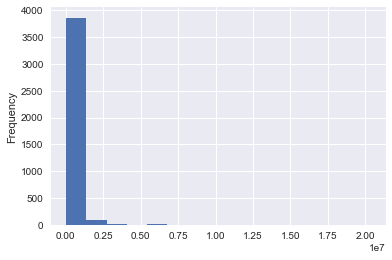

In [404]:
# Look at the overall distribution

ksmb.pledged_amount.plot(kind = 'hist', bins = 15);

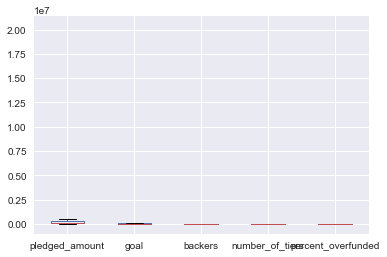

In [405]:
# Box plot
ksmb.plot(kind = 'box');

# Create some visualizations of the data

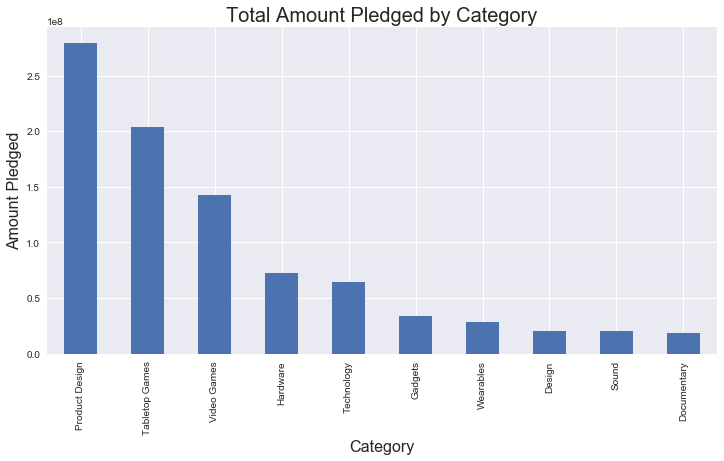

In [170]:
# graph some exploratory graphs
amt_pledged = ksmb['pledged_amount'].groupby(ksmb['category'])
pledged_by_cat = amt_pledged.sum().sort_values(ascending = False)[0:10]

graph1 = pledged_by_cat.plot(kind = 'bar', figsize = (12,6))
graph1.set_title('Total Amount Pledged by Category', fontsize = 20)
graph1.set_xlabel('Category', fontsize = 16)
graph1.set_ylabel('Amount Pledged', fontsize = 16);


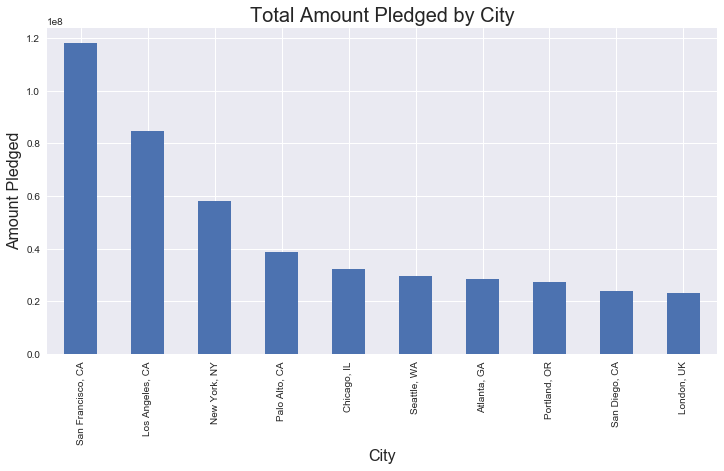

In [406]:
amt_pledged = ksmb['pledged_amount'].groupby(ksmb['location'])
pledged_by_city = amt_pledged.sum().sort_values(ascending = False)[0:10]

graph1 = pledged_by_city.plot(kind = 'bar', figsize = (12,6))
graph1.set_title('Total Amount Pledged by City', fontsize = 20)
graph1.set_xlabel('City', fontsize = 16)
graph1.set_ylabel('Amount Pledged', fontsize = 16);

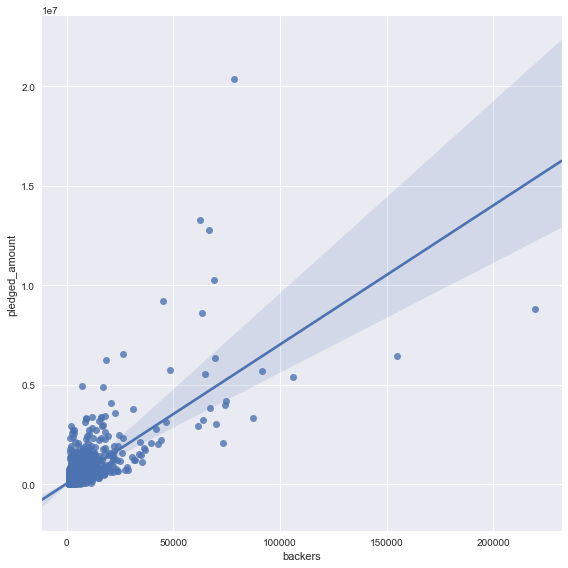

In [407]:
# Add a few more initial line regressions with the other numeric series. 

sns.lmplot(x = 'backers', y = 'pledged_amount', data = ksmb, size = 8);

In [409]:
# Take a peek at the correlations to get an idea of how the variables may look in regression

ksmb.corr()

,pledged_amount,goal,backers,number_of_tiers,percent_overfunded
pledged_amount,1.000000,0.436369,0.717901,0.073170,-0.003540
goal,0.436369,1.000000,0.444714,0.245191,-0.015824
backers,0.717901,0.444714,1.000000,0.085136,0.004176
number_of_tiers,0.073170,0.245191,0.085136,1.000000,-0.018696
percent_overfunded,-0.003540,-0.015824,0.004176,-0.018696,1.000000


In [410]:
ksmb.category.value_counts(ascending = False)[0:10]

Product Design    772
Tabletop Games    741
Video Games       524
Hardware          182
Technology        152
Documentary       123
Gadgets           121
Design             99
Comics             77
Wearables          64
Name: category, dtype: int64

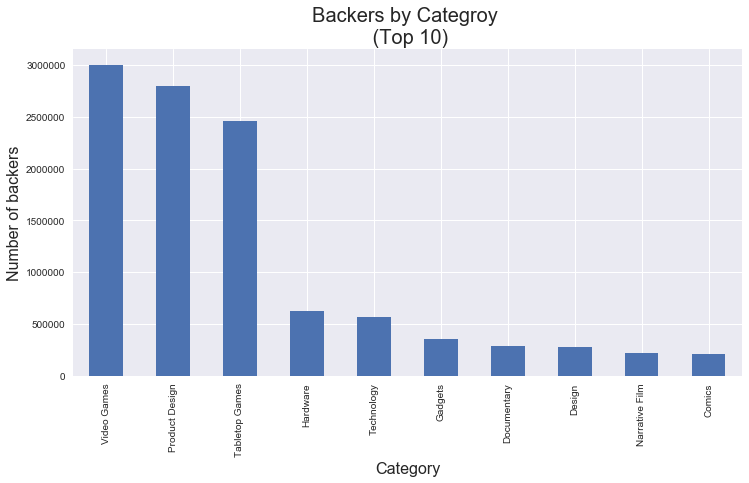

In [411]:
# Number of backers by category 

backers = ksmb['backers'].groupby(ksmb['category'])
backers_by_cat = backers.sum().sort_values(ascending=0)[0:10]


ax = backers_by_cat.plot(kind="bar", figsize = (12,6))
ax.set_title("Backers by Categroy \n (Top 10)",fontsize = 20)
ax.set_ylabel("Number of backers",fontsize = 16)
ax.set_xlabel("Category",fontsize = 16)
vals = ax.get_yticks()

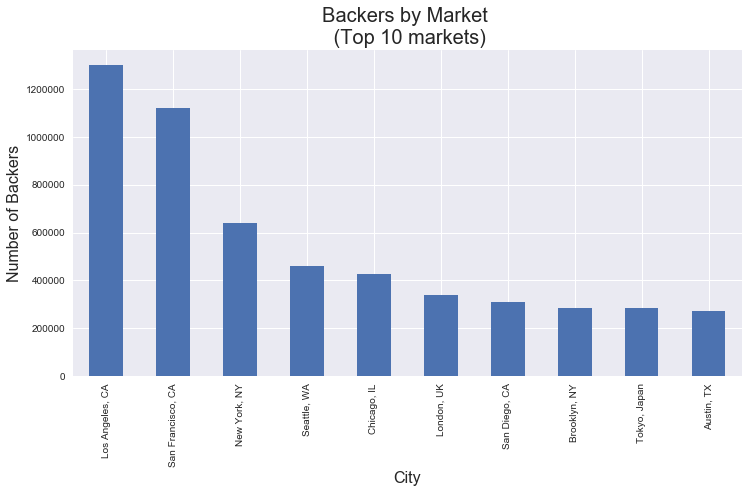

In [412]:
# Number of backers by city.

cities = ksmb['backers'].groupby(ksmb['location'])
top_10_cities = cities.sum().sort_values(ascending=0)[0:10]

ax = top_10_cities.plot(kind="bar", figsize = (12,6))
ax.set_title("Backers by Market \n (Top 10 markets)",fontsize = 20)
ax.set_ylabel("Number of Backers",fontsize = 16)
ax.set_xlabel("City",fontsize = 16)
vals = ax.get_yticks()

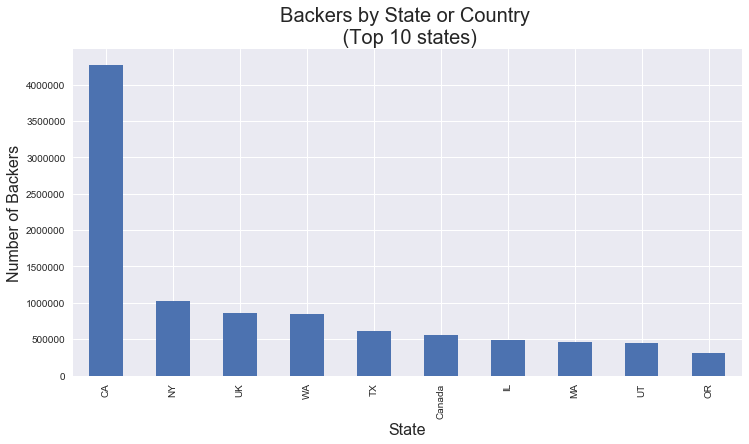

In [413]:
# Can we do number of projects in each category by market? Show where certain categories are concentrated

states = ksmb['backers'].groupby(ksmb['State'])
top_10_states = states.sum().sort_values(ascending=0)[0:10]

ax = top_10_states.plot(kind="bar", figsize = (12,6))
ax.set_title("Backers by State or Country \n (Top 10 states)", fontsize = 20)
ax.set_ylabel("Number of Backers", fontsize = 16)
ax.set_xlabel("State", fontsize = 16)
vals = ax.get_yticks()

# Analysis of Pledge Tiers

In [414]:
# Some analysis on tiers
contribution_by_tier = pd.Series()
for i in range(len(ksmb.index)):
    a = np.array(ksmb['pledge_tier'].iloc[i])
    b = np.array(ksmb['backers_by_tier'].iloc[i])
    contrib = pd.Series(list([a*b*100/np.sum(a*b)]))
    contribution_by_tier = contribution_by_tier.append(contrib)

In [415]:
contribution_by_tier.reset_index(drop=True,inplace=True)
contribution_by_tier.head()

0    [4.17065104387, 95.526738029, 0.268987490737, ...
1    [0.0134269814169, 0.0596376078163, 13.94475512...
2    [2.05450360916, 3.00094152108, 4.77874254629, ...
3    [0.109386899141, 1.55164340092, 5.3003276449, ...
4    [22.7184134796, 23.3467164929, 2.06591337695, ...
dtype: object

In [416]:
# Create the contribution percentage per tier
ksmb['percent_contribution_by_tier'] = contribution_by_tier
ksmb.head()

,pledged_amount,blurb,by,category,currency,goal,location,backers,backers_by_tier,pledge_tier,title,url,number_of_tiers,percent_overfunded,State,percent_contribution_by_tier
0,8782571.0,\r\nThis is a card game for people who are int...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505.0, 202934.0, 200.0, 5.0]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,4,878.257100,CA,"[4.17065104387, 95.526738029, 0.268987490737, ..."
1,6465690.0,"\r\nAn unusually addicting, high-quality desk ...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788.0, 250.0, 43073.0, 21796.0, 41727.0, 2162...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,12,431.046000,CO,"[0.0134269814169, 0.0596376078163, 13.94475512..."
2,5408916.0,\r\nBring Reading Rainbow’s library of interac...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639.0, 14343.0, 9136.0, 2259.0, 5666.0, 245...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...,64,5.408916,CA,"[2.05450360916, 3.00094152108, 4.77874254629, ..."
3,5702153.0,\r\nUPDATED: This is it. We're making a Veroni...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938.0, 8423.0, 11509.0, 22997.0, 23227.0, 18...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...,32,2.851077,CA,"[0.109386899141, 1.55164340092, 5.3003276449, ..."
4,3336371.0,"\r\nAn adventure game from Tim Schafer, Double...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946.0, 24636.0, 1090.0, 11530.0, 900.0, 148...","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure,9,8.340927,CA,"[22.7184134796, 23.3467164929, 2.06591337695, ..."


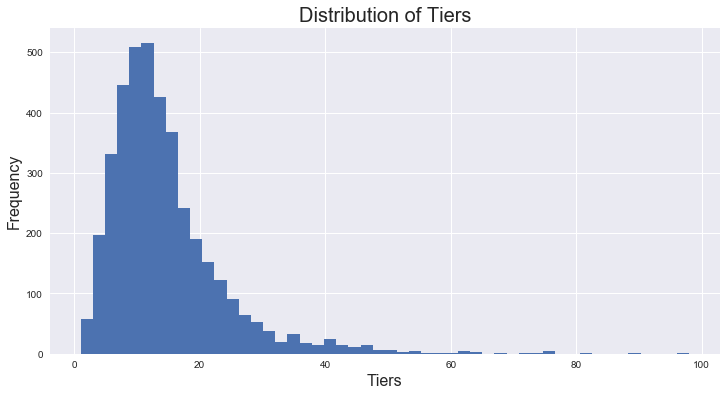

In [417]:
dist = ksmb['number_of_tiers'].plot(kind="hist", bins = 50, figsize = (12,6))
dist.set_title("Distribution of Tiers", fontsize = 20)
dist.set_ylabel("Frequency", fontsize = 16)
dist.set_xlabel("Tiers", fontsize = 16)
vals = dist.get_yticks()

#ksmb['number_of_tiers'].plot.hist(bins=50, figsize = (10,6), title = 'Distribtion of Tiers');

In [418]:
# Get the tier number of the highest contributing tier for each project

ksmb.percent_contribution_by_tier[0].argmax()

1

In [419]:
ksmb['highest_contrib_tier'] = ksmb['percent_contribution_by_tier'].apply(np.argmax).apply(lambda x: x+1)
ksmb.head()

,pledged_amount,blurb,by,category,currency,goal,location,backers,backers_by_tier,pledge_tier,title,url,number_of_tiers,percent_overfunded,State,percent_contribution_by_tier,highest_contrib_tier
0,8782571.0,\r\nThis is a card game for people who are int...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505.0, 202934.0, 200.0, 5.0]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,4,878.257100,CA,"[4.17065104387, 95.526738029, 0.268987490737, ...",2
1,6465690.0,"\r\nAn unusually addicting, high-quality desk ...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788.0, 250.0, 43073.0, 21796.0, 41727.0, 2162...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,12,431.046000,CO,"[0.0134269814169, 0.0596376078163, 13.94475512...",5
2,5408916.0,\r\nBring Reading Rainbow’s library of interac...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639.0, 14343.0, 9136.0, 2259.0, 5666.0, 245...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...,64,5.408916,CA,"[2.05450360916, 3.00094152108, 4.77874254629, ...",6
3,5702153.0,\r\nUPDATED: This is it. We're making a Veroni...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938.0, 8423.0, 11509.0, 22997.0, 23227.0, 18...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...,32,2.851077,CA,"[0.109386899141, 1.55164340092, 5.3003276449, ...",5
4,3336371.0,"\r\nAn adventure game from Tim Schafer, Double...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946.0, 24636.0, 1090.0, 11530.0, 900.0, 148...","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure,9,8.340927,CA,"[22.7184134796, 23.3467164929, 2.06591337695, ...",4


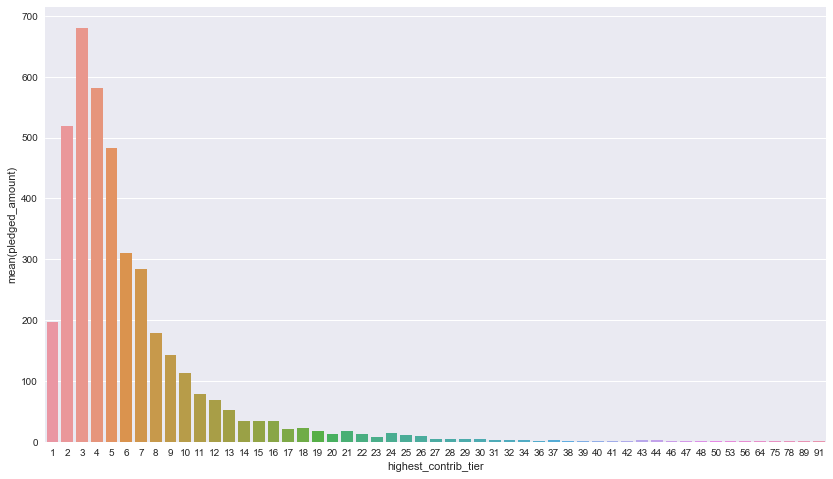

In [420]:
fig = plt.figure(figsize=(14,8))
sns.barplot(x=ksmb.groupby('highest_contrib_tier').count()['pledged_amount'].index,
            y=ksmb.groupby('highest_contrib_tier').count()['pledged_amount']);


In [421]:
ksmb.highest_contrib_tier.median()

5.0

It seems that the highest contributing pledge tiers tend to hover around the median, which may suggest that when people don't have a reference of how much a product should cost, they might default to the median price available. Project's may be able to take advantage of this information when setting their pledge tiers.

# Linear Regression

In [424]:
# Drop the columns we don't need for the linear regression

feature_cols = ksmb.drop(['pledged_amount','blurb','by','currency','location','url', 'category','title', 'backers_by_tier','pledge_tier','percent_overfunded', 'State','percent_contribution_by_tier', 'highest_contrib_tier'], axis=1)

feature_cols.head()

,goal,backers,number_of_tiers
0,10000.0,219382,4
1,15000.0,154926,12
2,1000000.0,105857,64
3,2000000.0,91585,32
4,400000.0,87142,9


In [425]:
X = feature_cols
y = ksmb.pledged_amount

In [426]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = 0.7)

In [427]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(3994, 3)
(2795, 3)
(1199, 3)


In [428]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [429]:
y_pred = lr.predict(X)
lr.coef_

array([  6.60167698e-01,   6.53421373e+01,  -9.15699117e+02])

In [430]:
from sklearn import metrics
metrics.r2_score(y, y_pred)

0.53194804434008769

In [431]:
print('MSE: ' + str(metrics.mean_squared_error(y, y_pred)))
print('RMSE: '+ str(np.sqrt(metrics.mean_squared_error(y, y_pred))))

MSE: 237526735896.0
RMSE: 487367.146919


In [432]:
ksmb.pledged_amount.mean()

290072.13895843766

In [433]:
import statsmodels.api as sm
from scipy import stats



X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         pledged_amount   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1517.
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        15:57:53   Log-Likelihood:                -57972.
No. Observations:                3994   AIC:                         1.160e+05
Df Residuals:                    3990   BIC:                         1.160e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             3.13e+04   1.44e+04     

In [434]:
# Run a K-folds cross validation 

from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)


mse_values = []
scores = []
n = 0
print("CROSS VALIDATION each fold")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
   
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))

    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))

print("SUMMARY OF CROSS VALIDATION")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: ' + str(np.sqrt(np.mean(mse_values))))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

CROSS VALIDATION each fold
Model 0
MSE: 173426387102.1344
R2: 0.5323472514683468

Model 0
MSE: 503623932143.4641
R2: 0.5291039925565761

Model 0
MSE: 162751171601.02197
R2: 0.5236900886987599

Model 0
MSE: 283661484161.065
R2: 0.5301024632812279

Model 0
MSE: 148146864305.40613
R2: 0.5291278084555774

SUMMARY OF CROSS VALIDATION
Mean of MSE for all folds: 254321967862.61835
Mean of RMSE for all folds: 504303.448196
Mean of R2 for all folds: 0.5288743208920976


# Limitations and Predicted Ommitted Variables

# Things to expand on in future

- In terms of price discrimination, could compare how close the average of the pledge tier prices that got you a copy of product vs final product?
- Scrape my own data, do it daily to get data on how projects get funded throughout the life of the funding period


# Some additional graphics using location

In [436]:
ksmbCA = ksmb[ksmb.State == 'CA']

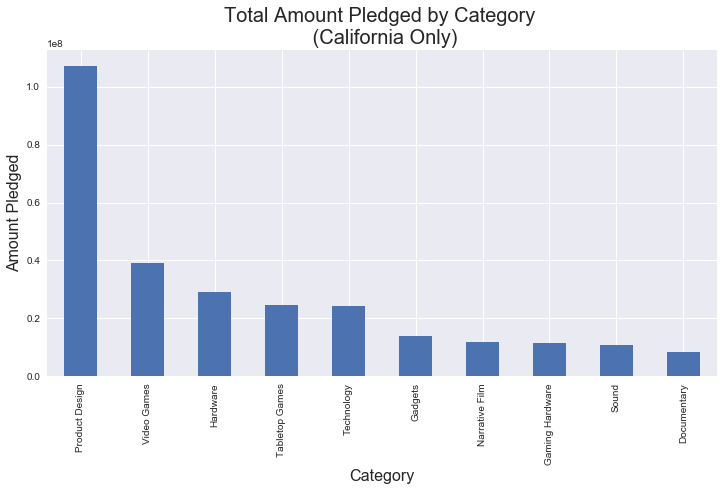

In [437]:
amt_pledged = ksmbCA['pledged_amount'].groupby(ksmbCA['category'])
pledged_by_catCA = amt_pledged.sum().sort_values(ascending = False)[0:10]

graph1 = pledged_by_catCA.plot(kind = 'bar', figsize = (12,6))
graph1.set_title('Total Amount Pledged by Category \n (California Only)', fontsize = 20)
graph1.set_xlabel('Category', fontsize = 16)
graph1.set_ylabel('Amount Pledged', fontsize = 16);

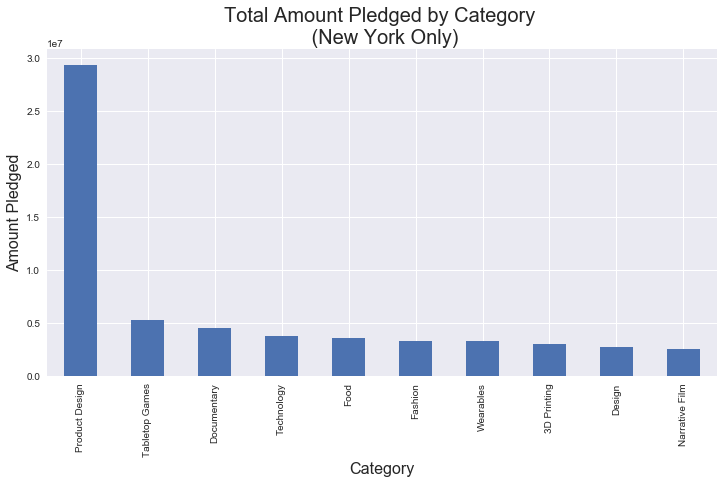

In [438]:
ksmbNY = ksmb[ksmb.State == 'NY']

amt_pledged = ksmbNY['pledged_amount'].groupby(ksmbNY['category'])
pledged_by_catNY = amt_pledged.sum().sort_values(ascending = False)[0:10]

graph1 = pledged_by_catNY.plot(kind = 'bar', figsize = (12,6))
graph1.set_title('Total Amount Pledged by Category \n (New York Only)', fontsize = 20)
graph1.set_xlabel('Category', fontsize = 16)
graph1.set_ylabel('Amount Pledged', fontsize = 16);

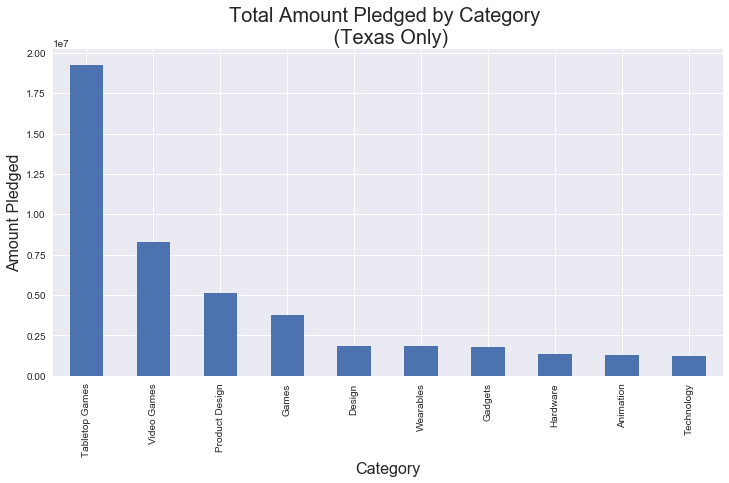

In [439]:
ksmbTX = ksmb[ksmb.State == 'TX']

amt_pledged = ksmbTX['pledged_amount'].groupby(ksmbTX['category'])
pledged_by_catTX = amt_pledged.sum().sort_values(ascending = False)[0:10]

graph1 = pledged_by_catTX.plot(kind = 'bar', figsize = (12,6))
graph1.set_title('Total Amount Pledged by Category \n (Texas Only)', fontsize = 20)
graph1.set_xlabel('Category', fontsize = 16)
graph1.set_ylabel('Amount Pledged', fontsize = 16);

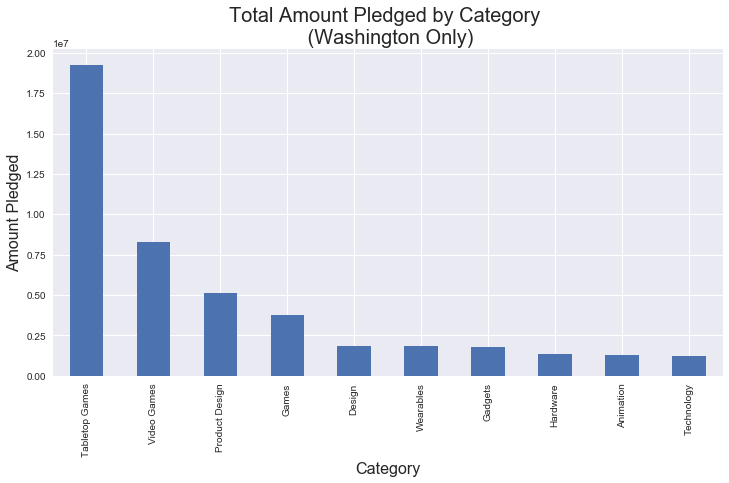

In [440]:
ksmbWA = ksmb[ksmb.State == 'WA']

amt_pledged = ksmbWA['pledged_amount'].groupby(ksmbTX['category'])
pledged_by_catWA = amt_pledged.sum().sort_values(ascending = False)[0:10]

graph1 = pledged_by_catTX.plot(kind = 'bar', figsize = (12,6))
graph1.set_title('Total Amount Pledged by Category \n (Washington Only)', fontsize = 20)
graph1.set_xlabel('Category', fontsize = 16)
graph1.set_ylabel('Amount Pledged', fontsize = 16);

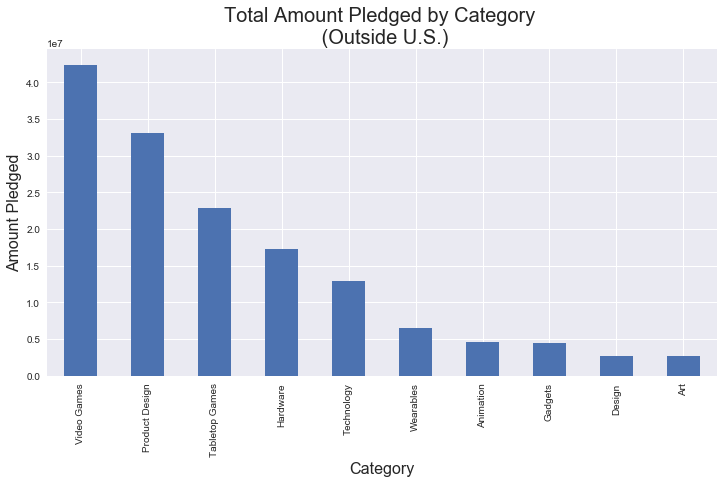

In [441]:
ksmbNotUS = ksmb[ksmb.State.str.len() >2]

amt_pledged = ksmbNotUS['pledged_amount'].groupby(ksmbNotUS['category'])
pledged_by_catNotUS = amt_pledged.sum().sort_values(ascending = False)[0:10]

graph1 = pledged_by_catNotUS.plot(kind = 'bar', figsize = (12,6))
graph1.set_title('Total Amount Pledged by Category \n (Outside U.S.)', fontsize = 20)
graph1.set_xlabel('Category', fontsize = 16)
graph1.set_ylabel('Amount Pledged', fontsize = 16);

In [442]:
ksmbNotUS.shape

(610, 17)